In [1]:
### permite obtener data frames directamente de internet
#!pip install yfinance
#!pip install pmdarima
#!pip install pyjanitor

In [1]:
import yfinance as yf
import pmdarima as pm
import pandas as pd # Para importar las BD
import numpy as np # Para trabajar con vectores, matrices y funciones especiales
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
#from datetime import datetime
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
plt.style.use('fivethirtyeight') # Para dar un estilo distinto a los gráficos
from statsmodels.tsa.statespace.sarimax import SARIMAX
import janitor
from janitor import clean_names
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

C:\Users\David\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\David\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
#define the ticker symbol
tickerSymbol = '^GSPC'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
gs = tickerData.history(period='1d', start='2018-1-1', end = "2022-11-12") # acaba 2022-11-11, la fecha inicial y final no son inclusives (inical + 1, final - 1)

#see your data
gs

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,2683.729980,2695.889893,2682.360107,2695.810059,3397430000,0,0
2018-01-03 00:00:00-05:00,2697.850098,2714.370117,2697.770020,2713.060059,3544030000,0,0
2018-01-04 00:00:00-05:00,2719.310059,2729.290039,2719.070068,2723.989990,3697340000,0,0
2018-01-05 00:00:00-05:00,2731.330078,2743.449951,2727.919922,2743.149902,3239280000,0,0
2018-01-08 00:00:00-05:00,2742.669922,2748.510010,2737.600098,2747.709961,3246160000,0,0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,0,0
2022-11-08 00:00:00-05:00,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,0,0
2022-11-09 00:00:00-05:00,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,0,0


# Limpieza

In [3]:
gs = gs.rename_axis('Date').reset_index()

In [4]:
gs

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02 00:00:00-05:00,2683.729980,2695.889893,2682.360107,2695.810059,3397430000,0,0
1,2018-01-03 00:00:00-05:00,2697.850098,2714.370117,2697.770020,2713.060059,3544030000,0,0
2,2018-01-04 00:00:00-05:00,2719.310059,2729.290039,2719.070068,2723.989990,3697340000,0,0
3,2018-01-05 00:00:00-05:00,2731.330078,2743.449951,2727.919922,2743.149902,3239280000,0,0
4,2018-01-08 00:00:00-05:00,2742.669922,2748.510010,2737.600098,2747.709961,3246160000,0,0
...,...,...,...,...,...,...,...,...
1221,2022-11-07 00:00:00-05:00,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,0,0
1222,2022-11-08 00:00:00-05:00,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,0,0
1223,2022-11-09 00:00:00-05:00,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,0,0
1224,2022-11-10 00:00:00-05:00,3859.889893,3958.330078,3859.889893,3956.370117,5781260000,0,0


In [5]:
gs = clean_names(gs)

In [6]:
gs["date"] = gs.date.dt.date
gs.head(4)

,date,open,high,low,close,volume,dividends,stock_splits
0,2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,3397430000,0,0
1,2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,3544030000,0,0
2,2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,3697340000,0,0
3,2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,3239280000,0,0


In [7]:
gs = gs[["date","close"]]
gs.head(4)

,date,close
0,2018-01-02,2695.810059
1,2018-01-03,2713.060059
2,2018-01-04,2723.989990
3,2018-01-05,2743.149902


# Justificación del modelo

## Modelo paramétrico

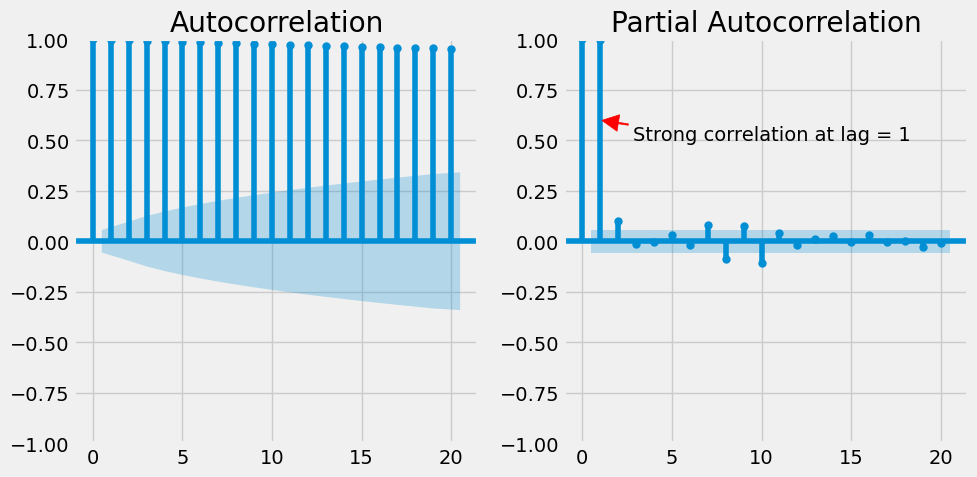

In [50]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plot_acf(gs.close,lags=20, ax=ax[0])
plot_pacf(gs.close,lags=20, ax=ax[1], method="ywm")

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

In [8]:
adfuller(gs.close) # valor p > 0.05, hay que tomar una diferencia

(-1.1824454774785973,
 0.681101274204013,
 9,
 1216,
 {'1%': -3.435739110194116,
  '5%': -2.863919777127088,
  '10%': -2.5680370312770515},
 12503.267376192522)

In [9]:
adfuller(gs.close.diff().dropna()) # valor p < 0.05, no hay que tomar más diferencias

(-10.918841986643208,
 1.0505588376444595e-19,
 8,
 1216,
 {'1%': -3.435739110194116,
  '5%': -2.863919777127088,
  '10%': -2.5680370312770515},
 12492.87011098454)

**Observación:** Se puede observar que la acf tiene un patrón cola con decaimiento lento, por lo que es necesario tomar diferencias, es decir, $d \geq 1$, en la pacf, se puede observar un patrón de cola alternando signos. De la prueba de dickey fuller aumentado, se puede observar que solo hay que tomar una diferencia. Por lo tanto, los modelos a ajustar son ARIMA(p,1,q), donde $p,q \geq 1$. Para esto, se usa la función pm.auto_arima del Python para hallar el "mejor" modelo.

## Modelo no paramétrico

In [53]:
# Holt?

In [54]:
#gs_test # 2022-11-11

In [55]:
modelo_holt = Holt(gs.close, exponential=True).fit() # 3491 observaciones

In [56]:
#len(gs)

# Presentación de los resultados

## Modelo paramétrico

In [57]:
gs_train = gs[0:len(gs)-8]
gs_test = gs[len(gs)-8:]

In [58]:
#modelo_arima = pm.auto_arima(gs_train.close, stepwise=False, seasonal = False, information_criterion="aic")

In [59]:
#modelo_arima # ARIMA(2,1,2)

In [60]:
modelo_arima = ARIMA(endog = gs_train.close, order=(2,1,2)).fit()

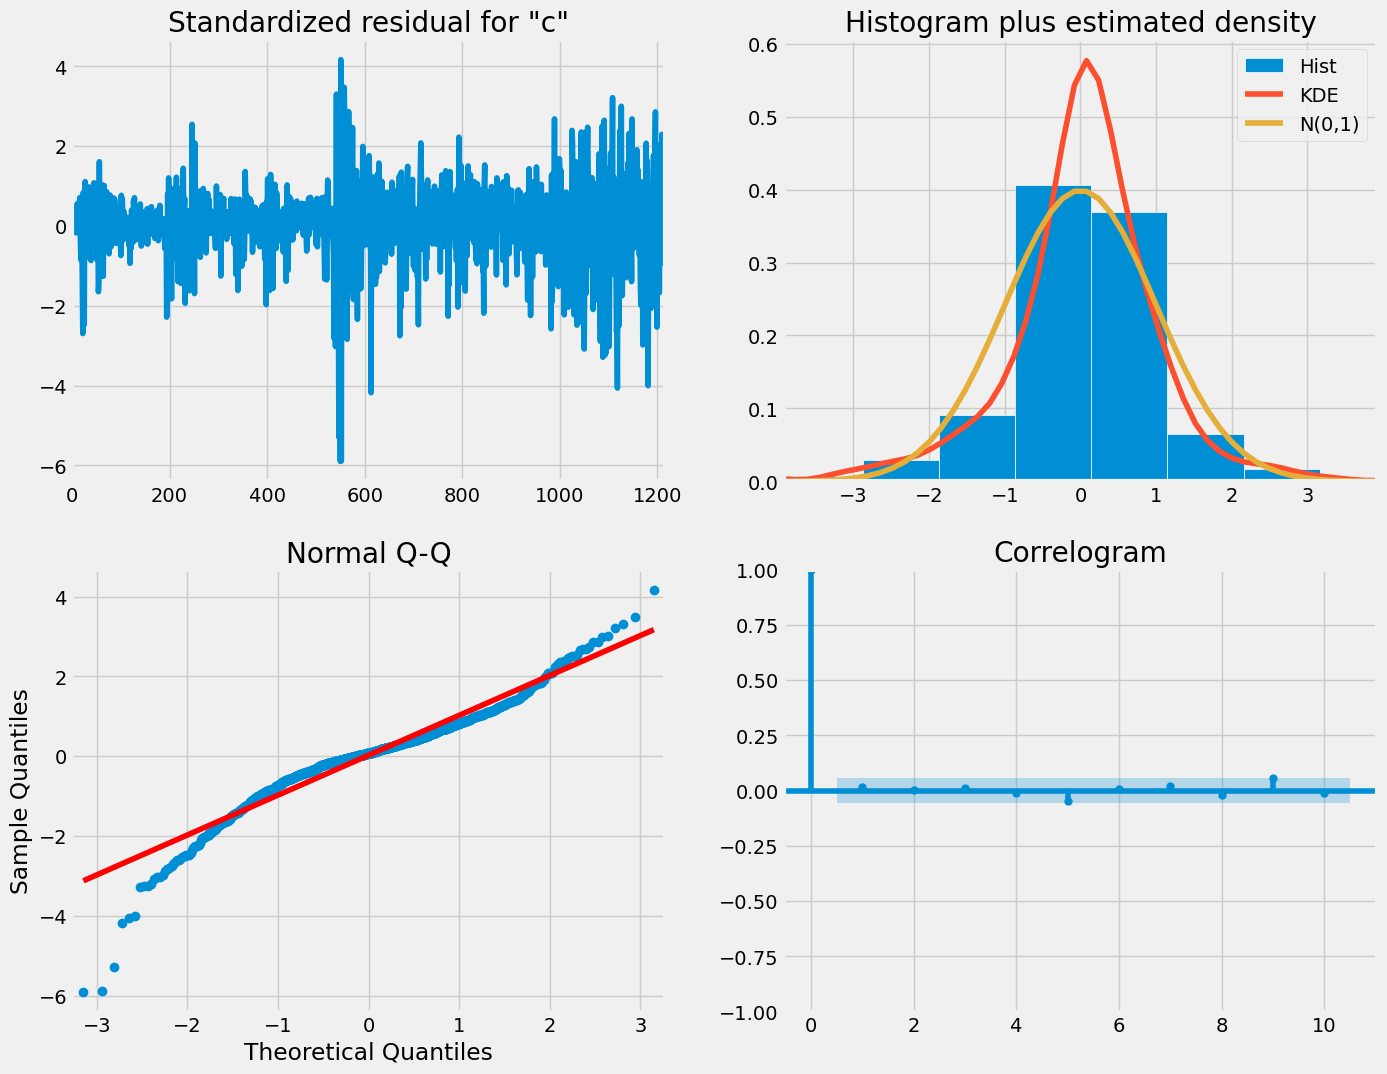

In [61]:
modelo_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

**Observación:** Del primer gráfico, se puede observar que los RB tienen media cero, pero no tiene varianza constante. Del segundo y tercer gráfico, se puede observar que los RB no se distribuye normal. Del cuarto gráfico, se puede observar que los RB tienen autocorrelación, ya que hay estimaciones que salen de la banda de confianza. Por lo tanto, hay violación en los supuestos del modelo.

## Modelo no paramétrico

In [62]:
modelo_holt.summary()

Dep. Variable:,close,No. Observations:,1226
Model:,Holt,SSE,2475026.309
Optimized:,True,AIC,9338.166
Trend:,Multiplicative,BIC,9358.612
Seasonal:,None,AICC,9338.235
Seasonal Periods:,None,Date:,"Sun, 13 Nov 2022"
Box-Cox:,False,Time:,11:07:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8771429,alpha,True
smoothing_trend,0.0219286,beta,True


# Realización y validación de las predicciones.

## Modelo paramétrico

In [63]:
fore = modelo_arima.get_forecast(8)
pred = fore.predicted_mean
pred

1218    3849.344933
1219    3849.914104
1220    3854.898418
1221    3845.628812
1222    3857.513913
1223    3844.826136
1224    3856.608087
1225    3847.130292
Name: predicted_mean, dtype: float64

In [64]:
pred_ci = fore.conf_int(alpha = 0.05)
pred_ci

,lower close,upper close
1218,3764.941312,3933.748554
1219,3735.755698,3964.072510
1220,3715.091931,3994.704905
1221,3684.238230,4007.019393
1222,3678.539580,4036.488246
1223,3647.468025,4042.184247
1224,3645.177714,4068.038461
1225,3619.777157,4074.483427


In [65]:
rmse = np.sqrt(np.mean((gs_test.close - pred)**2))
rmse

96.76417535822931

In [66]:
mape = 100*np.mean(np.abs(gs_test.close - pred)/np.abs(pred))
mape

2.318321635357397

In [67]:
# td_pred = np.concatenate((gs_train.close, pred))

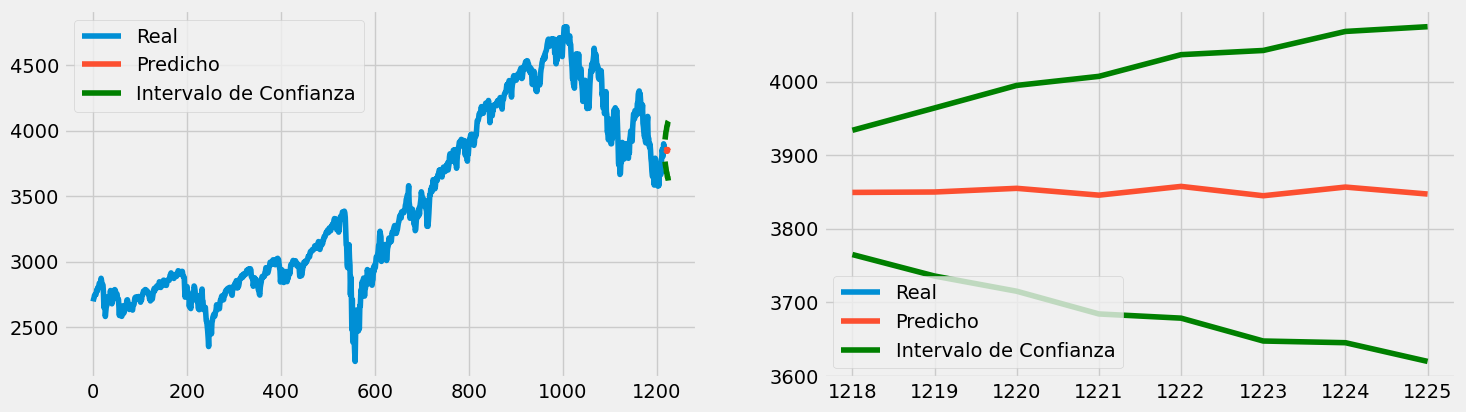

In [85]:
plt.figure(figsize=(16,10))  #  Graficamos:
plt.subplot(221)
gs_train.close.plot()
pred.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

plt.subplot(222) #  Graficamos:
gs_train.close.iloc[3470:,].plot()
pred.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])
plt.show()

## Modelo no paramétrico

In [69]:
# modelo_holt.forecast(5)

In [70]:
fecha = list()
for i in range(3,6):
  fecha.append(gs.date.iloc[-1] + datetime.timedelta(days=i)) # para sumar días a una fecha

In [71]:
# cosa = tickerData.history(period='1d', start='2022-11-11')
# cosa

In [72]:
predichos = np.array([3988.072, 3989.273, 3990.474, 3991.674, 3992.875]) # resultados del R

In [73]:
lwr = np.array([3900.421, 3871.758, 3849.270, 3830.218, 3813.433]) # resultados del R
upr = np.array([4075.723, 4106.788, 4131.677, 4153.131, 4172.317]) # resultados del R

In [16]:
predichos_param = np.array([3992.93, 3992.93, 3992.93, 3992.93, 3992.93]) # resultados del R

In [17]:
lwr_param = np.array([3915.095, 3882.855, 3858.116, 3837.260, 3818.886]) # resultados del R
upr_param = np.array([4070.765, 4103.005, 4127.744, 4148.599, 4166.974]) # resultados del R

In [18]:
fecha = ["2022-11-14","2022-11-15","2022-11-16","2022-11-17", "2022-11-18"]

In [ ]:
n = 5 # depende del número de pasos que hay que pronosticar, si son 5 pasos, entonces n = 5
indices = np.arange(len(gs), len(gs) + n)
# indices

In [19]:
variables_param = {'fecha': fecha, 'Pronósticos': predichos_param, "lwr": lwr_param, "upr": upr_param}

In [21]:
df_pronostico = pd.DataFrame(variables_param, index = indices)
df_pronostico

,fecha,Pronósticos,lwr,upr
1226,2022-11-14,3992.93,3915.095,4070.765
1227,2022-11-15,3992.93,3882.855,4103.005
1228,2022-11-16,3992.93,3858.116,4127.744
1229,2022-11-17,3992.93,3837.260,4148.599
1230,2022-11-18,3992.93,3818.886,4166.974


In [75]:
variables = {'fecha': fecha, 'Pronósticos': predichos, "lwr": lwr, "upr": upr}

In [77]:
df_pronostico2 = pd.DataFrame(variables, index = indices)
df_pronostico2

,fecha,Pronósticos,lwr,upr
1226,2022-11-14,3988.072,3900.421,4075.723
1227,2022-11-15,3989.273,3871.758,4106.788
1228,2022-11-16,3990.474,3849.270,4131.677
1229,2022-11-17,3991.674,3830.218,4153.131
1230,2022-11-18,3992.875,3813.433,4172.317


In [78]:
# rmse = np.sqrt(np.mean((gs_test.close - pred_holt)**2))
# rmse

In [79]:
# mape = 100*np.mean(np.abs(gs_test.close - pred_holt)/np.abs(pred_holt))
# mape

In [80]:
# td_pred_holt = np.concatenate((gs_train.close, pred_holt))

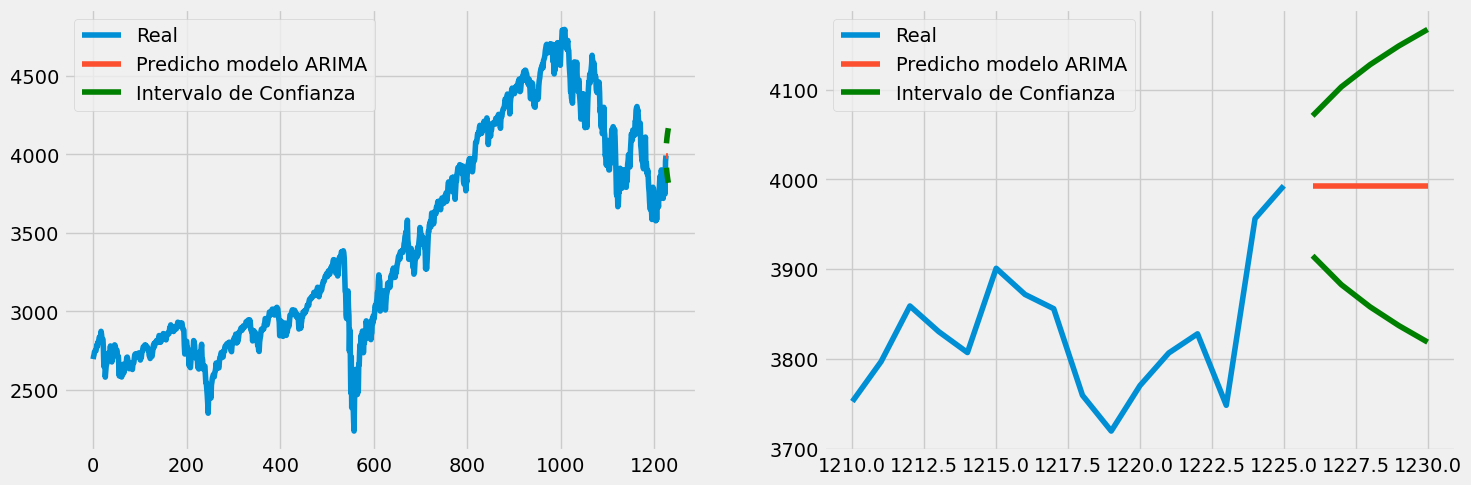

In [23]:
plt.figure(figsize=(16,12))  #  Graficamos:
plt.subplot(221)
gs.close.plot()
df_pronostico.iloc[:,1].plot()
df_pronostico.iloc[:,2].plot(color="green")
df_pronostico.iloc[:,3].plot(color="green")
plt.legend(["Real", "Predicho modelo ARIMA", "Intervalo de Confianza"])

plt.subplot(222) #  Graficamos:
gs.close.iloc[1210:,].plot()
df_pronostico.iloc[:,1].plot()
df_pronostico.iloc[:,2].plot(color="green")
df_pronostico.iloc[:,3].plot(color="green")
plt.legend(["Real", "Predicho modelo ARIMA", "Intervalo de Confianza"])
plt.show()

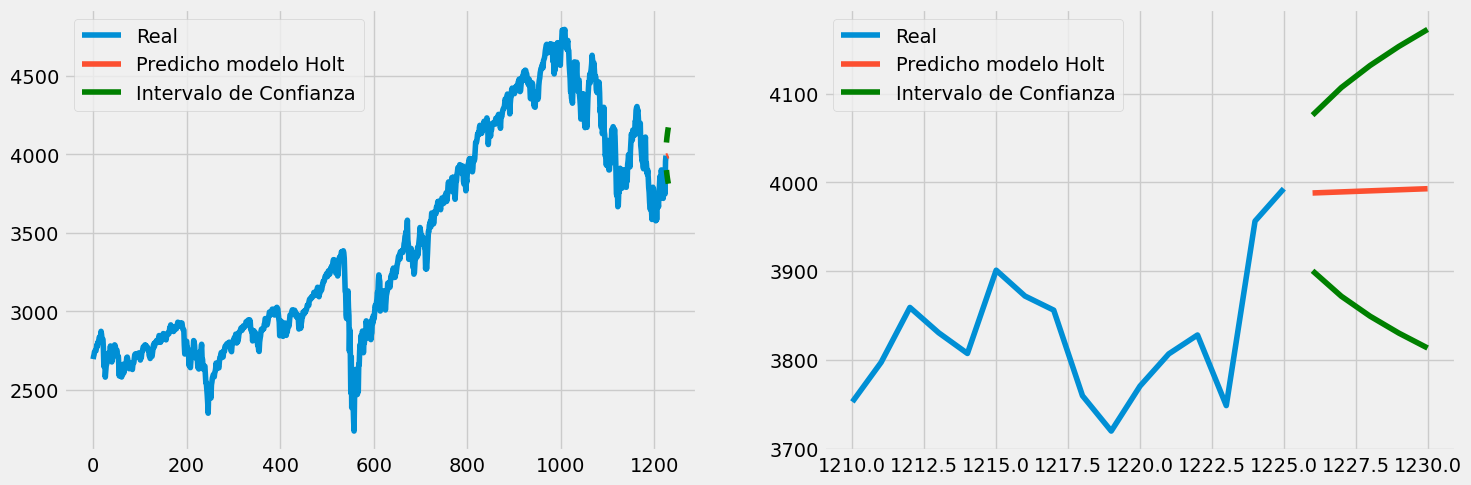

In [89]:
plt.figure(figsize=(16,12))  #  Graficamos:
plt.subplot(221)
gs.close.plot()
df_pronostico2.iloc[:,1].plot()
df_pronostico2.iloc[:,2].plot(color="green")
df_pronostico2.iloc[:,3].plot(color="green")
plt.legend(["Real", "Predicho modelo Holt", "Intervalo de Confianza"])

plt.subplot(222) #  Graficamos:
gs.close.iloc[1210:,].plot()
df_pronostico2.iloc[:,1].plot()
df_pronostico2.iloc[:,2].plot(color="green")
df_pronostico2.iloc[:,3].plot(color="green")
plt.legend(["Real", "Predicho modelo Holt", "Intervalo de Confianza"])
plt.show()

# Conclusiones y recomendaciones